# Experiment on feature aggregation with BLS algorithm.
* This is an experimental idea that aggregate data points on longer time span than just one minute will improve performance and stability for any models other than RNN, especially in Fscore. 
* It is based on the thinking: An anomaly should and can only be determined by the features acrossing a rather large time span. The features extracted from the messages within only one minute are not enough to determine if there is an anomaly in this minute of time.   
* In this experiment, Aggregation of some time spans from 1 to 60 will be tested and the according mesurements (accuracy and fscore) will be compared. 

#### The base line has the following settings:
1. using aggregated data( max, avg, sum )
2. No slide window
3. Use StandardScaler

#### The evaluation matrix includs the following metrics:
1. Accuracy
2. F1-score
3. Precision
4. Recall

### Define the algrothim - BLS

In [1]:
import numpy as np
from src.VFBLS_v110.bls.processing.one_hot_m import one_hot_m
from src.VFBLS_v110.bls.model.bls_train import bls_train_realtime
from src.VFBLS_v110.bls.model.vfbls_train import vfbls_train_realtime


print("============================ BLS ============================\n")
def train_test(train_x, train_y, test_x):
    # Set parameters
    seed = 1  # set the seed for generating random numbers
    num_class = 2  # number of the classes
    epochs = 1  # number of epochs
    C = 2 ** -15  # parameter for sparse regularization
    s = 0.6  # the shrinkage parameter for enhancement nodes
    if ALGORITHM == 'BLS':
        mem = 'low'
        # mem = 'high'
        train_y = one_hot_m(train_y, num_class)
        if mem == 'low':
            N1_bls = 20
            N2_bls = 5
            N3_bls = 100
        else:
            N1_bls = 200
            N2_bls = 10
            N3_bls = 100
    elif ALGORITHM == 'VFBLS':
        N1_bls_fsm = 100
        N2_bls_fsm = 10
        N3_bls_fsm = 100

        N1_bls_fsm1 = 30
        N2_bls_fsm1 = 10

        N1_bls_fsm2 = 30
        N2_bls_fsm2 = 10

        add_nFeature1 = 16
        add_nFeature2 = 8
    else:
        print("Please specify a BLS algorithm.")
        exit(1)

    np.random.seed(seed)  # set the seed for generating random numbers
    for j in range(0, epochs):
        if ALGORITHM == 'BLS':
            _, _, _, predicted = bls_train_realtime(train_x, train_y, test_x, s, C,
                            N1_bls, N2_bls, N3_bls)
        elif ALGORITHM == 'VFBLS':
            _, _, _, predicted = vfbls_train_realtime(train_x, train_y, test_x, s, C,
                            N1_bls_fsm, N2_bls_fsm, N3_bls_fsm,
                            N1_bls_fsm1, N2_bls_fsm1,
                            N1_bls_fsm2, N2_bls_fsm2,
                            add_nFeature1, add_nFeature2)
    # predicted = [[1.], [2.], [2.], [2.], [2.]]
    predicted_list = []
    for label in predicted:
        predicted_list.append(label[0])
    return predicted_list


============================ BLS ============================



### Integrated run

============================ BLS ============================

outlier: upper
agg_type: origin
Data combo: {'train': ['Code_Red_I', 'Nimda'], 'test': 'Slammer'}
Raw training datasets shape:  [(7200, 42), (8609, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (7308, 1301)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6331 869
Data combo: {'train': ['Nimda', 'Slammer'], 'test': 'Code_Red_I'}
Raw training datasets shape:  [(8609, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(7308, 1301), (6331, 869)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6600 600
Data combo: {'train': ['Code_Red_I', 'Slammer'], 'test': 'Nimda'}
Raw training datasets shape:  [(7200, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (6331, 869)]
Raw test dataset shape:  (8609, 42)
Raw test labels of regular and anomaly:  7308 1301
------------------------------ Time span: 0 ---------------------

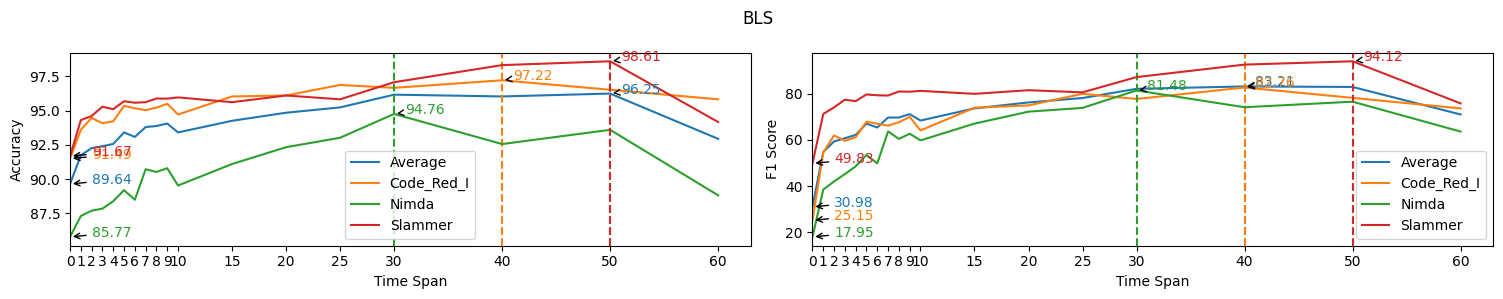

============================ VFBLS ============================

outlier: upper
agg_type: origin
Data combo: {'train': ['Code_Red_I', 'Nimda'], 'test': 'Slammer'}
Raw training datasets shape:  [(7200, 42), (8609, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (7308, 1301)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6331 869
Data combo: {'train': ['Nimda', 'Slammer'], 'test': 'Code_Red_I'}
Raw training datasets shape:  [(8609, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(7308, 1301), (6331, 869)]
Raw test dataset shape:  (7200, 42)
Raw test labels of regular and anomaly:  6600 600
Data combo: {'train': ['Code_Red_I', 'Slammer'], 'test': 'Nimda'}
Raw training datasets shape:  [(7200, 42), (7200, 42)]
Raw training labels of regular and anomaly:  [(6600, 600), (6331, 869)]
Raw test dataset shape:  (8609, 42)
Raw test labels of regular and anomaly:  7308 1301
------------------------------ Time span: 0 -------------------

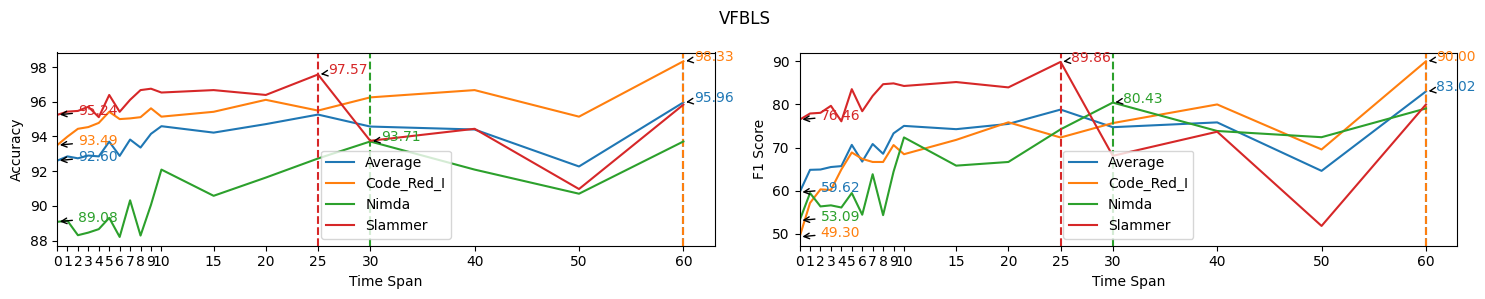

In [2]:
from src.xpr_test import *

time_span_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60]
data_combos = [{"train": ["Code_Red_I", "Nimda"], "test": "Slammer"},
                {"train": ["Nimda", "Slammer"], "test": "Code_Red_I"},
                {"train": ["Code_Red_I", "Slammer"], "test": "Nimda"},]

ALGORITHMS = ["BLS","VFBLS"]
for ALGORITHM in ALGORITHMS:
    print(f"============================ {ALGORITHM} ============================\n")
    results = aggregation_test(train_test, time_span_list, data_combos, results_file = f"xpr_{ALGORITHM}.csv")
    plot_aggregation_test_results(results, time_span_list, plot_precision_and_recall = False, title = f"{ALGORITHM}", plot_height = 3, auto_y = True)
